# Import Stuff

In [91]:
import numpy as np
import pandas as pd
import seaborn

# Parse Kraken File

In [25]:
filename = ['83', '86', '88', '89', '90', '93', '94', '97']
# Look through each file
for x in range(0, len(filename)):
    f = open('week13_data/KRAKEN/SRR4921' + filename[x] + '.kraken', 'r')
    # read all lines in 
    lines = f.readlines()
    f.close()
    # create temporary dictionary
    day_temp = {}
    # Add count based on taxonomy to dictionary based on each line
    for z in lines:
        temp = z.split('\t')[1]
        day_temp.setdefault(temp, 0)
        day_temp[temp] += 1

    # Create new file to write out too based on day
    f = open('week13_data/KRAKEN/day' + str(x) + '.kraken', 'w')
    # for each count in dictonary write out tab separated 
    for key, item in day_temp.items():
        test = key.split(';')
        f.write(str(item) + '\t')
        for y in test[:-1]:
            f.write(y + '\t')
        f.write(test[-1])
    f.close()

# Run Krona On each Day

> conda install krona

> ktImportText day0.kraken -o day0.krona.html

> ktImportText day1.kraken -o day1.krona.html

> ktImportText day2.kraken -o day2.krona.html

> ktImportText day3.kraken -o day3.krona.html

> ktImportText day4.kraken -o day4.krona.html

> ktImportText day5.kraken -o day5.krona.html

> ktImportText day6.kraken -o day6.krona.html

> ktImportText day7.kraken -o day7.krona.html

# Question 1

Enterococcus faecalis increases from day 0 to day 1 but then slowly decreases from day 1 to day 7 but is overall one of the largest clusters. As it increases and then decreases actinobacteria, the phylum mainly compsed of cutibacterium acidum goes from ~17-18% in day 0 to less than 1% from day 1-4 and then grows from 3% day 5-6 to 27% on day 7. Along with the actinobacteria increasing as enerococcus faecalis decreases, the couple species of staphylococcus also grow from day 1 to day 6 after which rapidly shrinks as actinobacteria rapidly increases day 6 to 7. Finally there is always a less than 1% of virus seen.

# Question 2

The length of the overlap of the contigs could be used to group them and the percent identity of the overlaps as well could be used to bin the contigs. The larger the overlap with high percent identity would indicate that the two contigs should be binned together.

> bwa index -a bwtsw week13_data/assembly.fasta 

Run a bash script after making exacutable to convert to sam format
> ./sam.sh

Run a bash script after making exacutable to convert to bam format for metabat
> ./bam.sh

Create depth files (change conda environment for this)
> jgi_summarize_bam_contig_depths --outputDepth depth.txt *.bam

Metabat 
> metabat2 -i week13_data/assembly.fasta -a depth.txt -o bins_dir/bin

# Question 3

(A) Formed 6 bins.

(B) Using the commands "grep ">" week13_data/assembly.fasta | wc" and "grep ">" bin.1.fa | wc" where the bin number changes to refer to different bins I find that the bins represent roughly 5% of the assembly.

(C) The size of most of the bins looks about right since since a prokaryotic genome is between 1-10 million bp long and based on quick estimation using word count of each bin these contain 1-3 million characters of which 99.9% of those are the base pairs. Bin 3 only has 274 thousand characters so that is much smaller than a prokaryotic genome.

(D) Pull the corresponding lineage for each bin and determine what it represents and then see if it has contaminants and to determine how complete determine how many more of what the bin represents are in the assembly that are not in the bin.


In [88]:
# first create assembly dictionary after read in assembly kraken file
assembly = open('week13_data/KRAKEN/assembly.kraken', 'r')
alines = assembly.readlines()
assembly.close()
assembly_dict = {}
for line in alines:
    temp = line.split('\t')
    assembly_dict[temp[0]] = temp[1].strip().split(';')

node = []
for x in range(1, 9):
    f = open('bins/bin.' + str(x) + '.fa', 'r')
    # read all lines in 
    bins = f.readlines()
    f.close()
 #   node = []
    # create dictionarys for 9 levels of classification
    domain = {}
    kingdom = {}
    phylum = {}
    class_ = {}
    order = {}
    family = {}
    genus = {}
    species = {}
    lineage = [domain, kingdom, phylum, class_, order, family, genus, species]
    # Pull each node from assemby and put into dictionarys based on classification
    for z in bins:
        if '>' in z:
            node = z.strip().split('>')[1]
            if node in assembly_dict:
                line = assembly_dict[node]
            if len(line) > 10:
                end_lineage = 10
            else:
                end_lineage = len(line)
            for w in range(1, end_lineage):
                # to keep subkingdom in kingdom
                if w >= 3:
                    lineage[w-2].setdefault(line[w], 0)
                    lineage[w-2][line[w]] += 1
                else:
                    lineage[w-1].setdefault(line[w], 0)
                    lineage[w-1][line[w]] += 1
    #  write out classifications that can then be examined
    lineage_str = ["DOMAIN", "KINGDOM", "PHYLUM", "CLASS", "ORDER", "FAMILY", "GENUS", "SPECIES"]
    print("\nBin" + str(x))
    for y in range(len(lineage)):
        print(lineage_str[y])
        for key, item in lineage[y].items():
            print(key + "\t" + str(item))

 


Bin1
DOMAIN
cellular organisms	72
KINGDOM
Bacteria	72
Terrabacteria group	72
PHYLUM
Firmicutes	72
CLASS
Bacilli	70
Tissierellia	2
ORDER
Bacillales	70
Tissierellales	2
FAMILY
Staphylococcaceae	70
Peptoniphilaceae	2
GENUS
Staphylococcus	70
Anaerococcus	2
SPECIES
Staphylococcus haemolyticus	46
Staphylococcus epidermidis	9
Staphylococcus aureus	14
Anaerococcus prevotii	2

Bin2
DOMAIN
cellular organisms	217
KINGDOM
Bacteria	217
Terrabacteria group	217
PHYLUM
Firmicutes	217
CLASS
Bacilli	217
ORDER
Lactobacillales	217
FAMILY
Leuconostocaceae	216
Streptococcaceae	1
GENUS
Leuconostoc	216
Streptococcus	1
SPECIES
Leuconostoc citreum	208
Leuconostoc kimchii	6
Leuconostoc gelidum	1
Leuconostoc mesenteroides	1
Streptococcus thermophilus	1

Bin3
DOMAIN
cellular organisms	74
KINGDOM
Bacteria	74
Terrabacteria group	74
PHYLUM
Firmicutes	74
CLASS
Bacilli	74
ORDER
Bacillales	74
FAMILY
Staphylococcaceae	74
GENUS
Staphylococcus	74
SPECIES
Staphylococcus lugdunensis	74

Bin4
DOMAIN
cellular organisms	6
KING

# Question 4

(A) I would predict that each bin would be grouped by class or order however when I compared my talies of taxonomy lineages for each bin I found a lot or complete overlap down all the way to species for some bins. There was for example bin5 which was a completely different phylum (actinobacteria) but not always the case. Also bin8 seemed to be a - put everything that didnt bin previously into this one. This is mainly how the bins appear to most represent:
1: Staphylococcus haemolyticus
2: Leuconostoc citreum
3: Staphylococcus lugdunensis
4: Enterococcus faecalis
5: Cutibacterium avidum
6: Staphylococcus epidermidis
7: Staphylococcus aureus
8: Unclassified

(B) One method would be to use the Bin Annotation Tool and Contig Annotation Tool which involve gene galling and mapping of the predicted ORFs against the nr protein database. Then it does voting-based classification of the bin or contig based on the classification of the individual ORFs. This is similar but I I like the idea of mapping them back and then doing voting-based classification. It would also be interesting to map all the contigs in one bin back all at once and see where they fall.

In [110]:
df = pd.read_csv("abundance_table.tab", delimiter = "\t")
df

,Genomic bins,SRR492186,SRR492066,SRR492182,SRR492188,SRR492196,SRR492183,SRR492184,SRR492185,SRR492065,SRR492187,SRR492197,SRR492189,SRR492195,SRR492194,SRR492193,SRR492192,SRR492191,SRR492190
0,bin.1,167.273691,67.688884,54.858154,102.432386,335.756912,50.103235,96.383771,175.127948,71.420624,190.391037,72.544371,97.521190,49.834345,53.357374,172.449773,179.006341,14.685431,14.523105
1,bin.4,9348.741359,7247.577187,4178.397657,8139.870719,11597.033828,4115.242526,11633.667679,9219.720953,7240.045338,9979.380909,8745.103316,8308.156703,6646.119922,6550.505763,6267.155205,6151.257743,5780.879180,5267.858711
2,bin.2,8.887730,5.406628,1.986297,5.838109,8.348499,1.751119,31.799458,9.170054,6.087799,37.581807,19.275630,5.929623,3.451473,3.259988,1.804228,1.629252,4.652603,4.583909
3,bin.5,0.552469,2034.534641,1232.387641,0.875860,0.436084,1566.783656,670.257316,0.747395,1869.640953,108.026882,4250.653466,0.356678,593.767516,457.543378,315.740755,282.011644,0.772755,1.251430
4,bin.6,820.872805,392.881731,1427.905710,1033.761424,1884.339618,1335.147536,1027.807284,850.342196,427.134461,2391.501197,936.681889,999.273162,1143.743857,1187.660153,1670.022745,1719.723610,1136.902519,1071.641137
5,bin.7,1.452063,681.886830,2.467008,1.347894,3.084744,1.287979,2124.191118,2.312693,714.809488,7.140755,590.194971,0.747525,1093.414384,1124.427189,6.459688,7.175036,1.496781,3.287205
6,bin.8,0.065351,3219.448810,0.223916,4.223711,0.698382,0.186461,889.316796,0.181546,3498.783627,1.199693,3366.910935,0.979570,71.465536,73.851083,1.211367,4.114233,0.088835,0.259990
7,bin.3,6.194380,23.178964,2.759951,0.475050,1.563200,2.555610,1.259343,6.237916,24.206000,137.042032,10.595311,0.333899,6.668268,6.639770,78.291586,79.491024,0.523699,0.491073


In [128]:
# Naming based on the most prevalent genus and species unless 
# not distinctly clear
df["Genomic bins"][0] = "Staphylococcus haemolyticus"
df["Genomic bins"][1] = "Enterococcus faecalis"
df["Genomic bins"][2] = "Leuconostoc citreum"
df["Genomic bins"][3] = "Cutibacterium avidum"
df["Genomic bins"][4] = "Staphylococcus epidermidis"
df["Genomic bins"][5] = "Staphylococcus aureus"
df["Genomic bins"][6] = "Unclassified"
df["Genomic bins"][7] = "Staphylococcus lugdunensis"
df = df.set_index("Genomic bins")

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

In [134]:
days = df.iloc[:, [5, 0, 3, 11, 17, 14, 13, 10]]
days.columns = ["day0", "day1", "day2", "day3", "day4", "day5", "day6", "day7"]
days

,day0,day1,day2,day3,day4,day5,day6,day7
Genomic bins,,,,,,,,
Staphylococcus haemolyticus,50.103235,167.273691,102.432386,97.521190,14.523105,172.449773,53.357374,72.544371
Enterococcus faecalis,4115.242526,9348.741359,8139.870719,8308.156703,5267.858711,6267.155205,6550.505763,8745.103316
Leuconostoc citreum,1.751119,8.887730,5.838109,5.929623,4.583909,1.804228,3.259988,19.275630
Cutibacterium avidum,1566.783656,0.552469,0.875860,0.356678,1.251430,315.740755,457.543378,4250.653466
Staphylococcus epidermidis,1335.147536,820.872805,1033.761424,999.273162,1071.641137,1670.022745,1187.660153,936.681889
Staphylococcus aureus,1.287979,1.452063,1.347894,0.747525,3.287205,6.459688,1124.427189,590.194971
Unclassified,0.186461,0.065351,4.223711,0.979570,0.259990,1.211367,73.851083,3366.910935
Staphylococcus lugdunensis,2.555610,6.194380,0.475050,0.333899,0.491073,78.291586,6.639770,10.595311


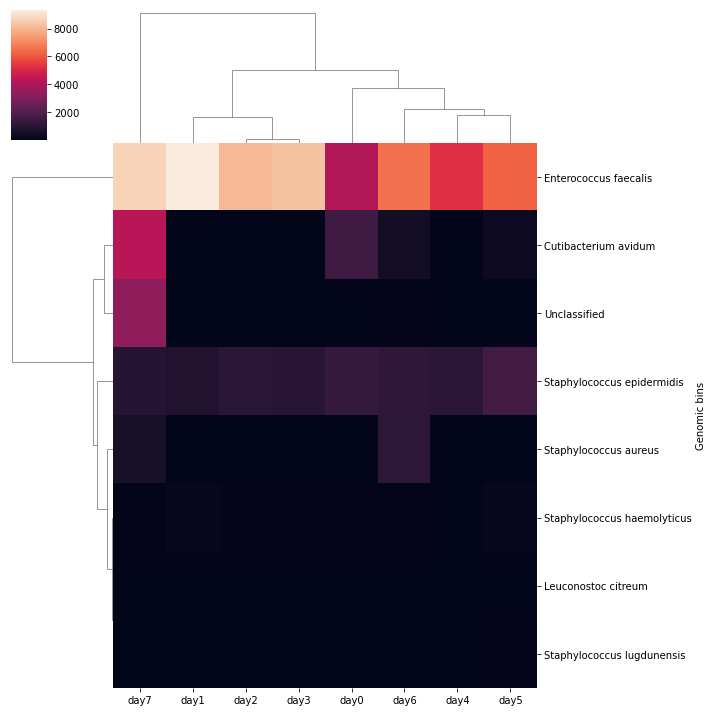

In [135]:
seaborn.clustermap(days)

# Question 5

The results overall mainly agree with eachother in terms of trends. The same trends I observed for Enterococcus facecalis and Cutibacterium avidum are observed in the above clustermap. The one thing that this cluster map doesnt really show/give a good indication of is how the Saphylococcus genus groups together and does form a large portion since they are split between different bins.